In this notebook there will be:
* correlation between dimensions of poverty
* correlation with RWI

In [1]:
pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.8 MB/s 


In [2]:
import numpy as np
import pandas as pd
import h3.api.numpy_int as h3

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path = '/content/drive/MyDrive/DSSG (STC   UNICEF)/data'

In [4]:
nga_clean = pd.read_csv(path + '/clean/training_data/nga_clean_v1.csv')

In [5]:
# Raw DHS data
nga_dhs = pd.read_csv(path + '/raw/dhs/clean_nga_dhs.csv')

# Correlation with RWI

In [ ]:
nga_rwi = pd.read_csv(path + '/raw/rwi/NGA_relative_wealth_index.csv')

In [ ]:
nga_rwi.head()

,quadkey,latitude,longitude,rwi,error
0,12222122333002,5.758105,6.866455,0.934,0.496
1,12222033311222,6.151478,5.460205,-0.501,0.381
2,12222121311330,7.569437,8.404541,-0.431,0.373
3,12220232130230,12.071552,3.922119,-0.384,0.345
4,12220323311132,11.792080,8.404541,0.454,0.460


In [ ]:
# Compute the hexagon code with resolution 7
nga_rwi['hex_code'] = nga_rwi.apply(lambda x: h3.geo_to_h3(lat=x['latitude'], lng=x['longitude'], resolution=7), axis=1)

In [ ]:
# Add the RWI to the hexagons, taking the mean 
nga_rwi_grouped = nga_rwi.groupby('hex_code', as_index=False)['rwi'].mean()
nga_clean = pd.merge(nga_clean, nga_rwi_grouped, how='left', on='hex_code')

In [ ]:
# Compute NA values
# There are NA values
nga_clean['rwi'].isna().value_counts()

False    970
True     388
Name: rwi, dtype: int64

In [ ]:
nga_dims_rwi = nga_clean[nga_clean['rwi'].isna()==False][['sumpoor_sev',
       'dep_housing_sev', 'dep_water_sev', 'dep_sanitation_sev',
       'dep_nutrition_sev', 'dep_health_sev', 'dep_education_sev',
       'deprived_sev', 'rwi']]

Text(0.5, 1.0, 'Dimensions Correlating with RWI')

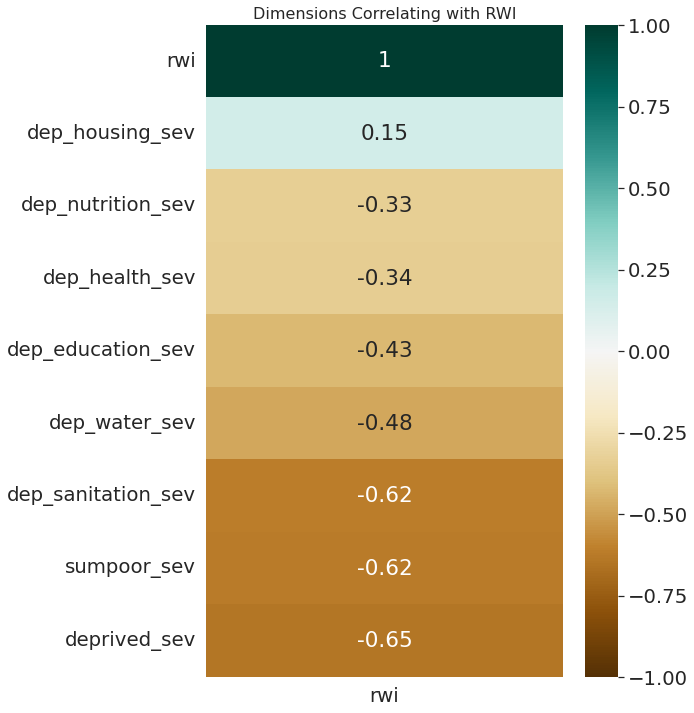

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(nga_dims_rwi.corr()[['rwi']].sort_values(by='rwi', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dimensions Correlating with RWI', fontdict={'fontsize':16})

# Correlation between dimensions of poverty

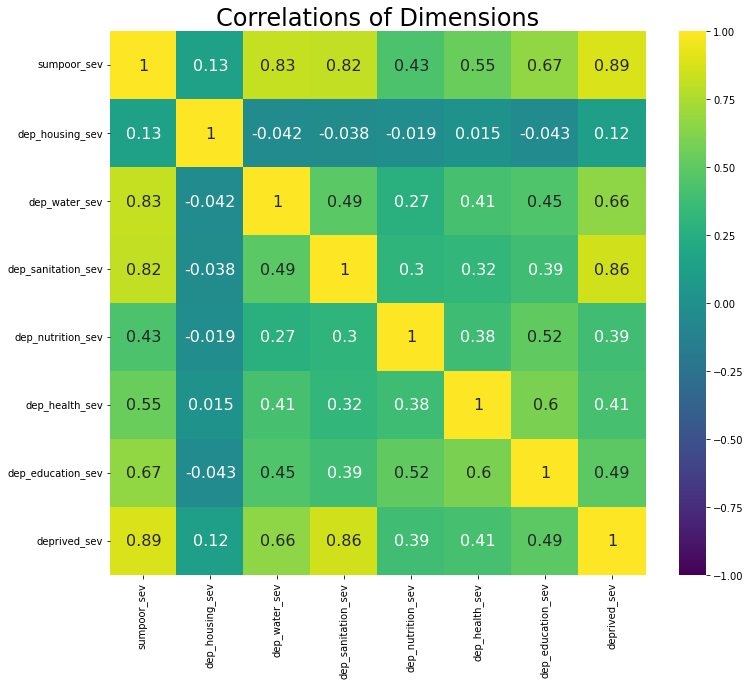

In [ ]:
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(nga_clean[['sumpoor_sev',
       'dep_housing_sev', 'dep_water_sev', 'dep_sanitation_sev',
       'dep_nutrition_sev', 'dep_health_sev', 'dep_education_sev',
       'deprived_sev']].corr(), vmin=-1, vmax=1, annot=True, cmap = 'viridis',annot_kws={"size": 16})
heatmap.set_title('Correlations of Dimensions', fontdict={'fontsize':24})
sns.set(font_scale=1.8)

# Number of children per hexagon

In [6]:
nga_dhs.head(2)

,countrycode,year,survey,round,cluster,hhid,indid,location,sex,wealth,...,dep_nutrition_sev,dep_health_sev,dep_education_sev,deprived_sev,region,region2,dhscode,LATNUM,LONGNUM,hex_code
0,NGA,2018.0,DHS,72,1,35,3,1,2,5.0,...,0.0,NaN,NaN,0,1,180.0,nga72,7.720049,8.506936,609550763097587711
1,NGA,2018.0,DHS,72,1,25,3,1,1,5.0,...,NaN,0.0,NaN,0,1,180.0,nga72,7.720049,8.506936,609550763097587711


In [10]:
df = nga_dhs.groupby('hex_code')['age'].count().reset_index()
df = df.rename(columns={'age':'num_children'})
df.head(2)

,hex_code,num_children
0,609534210041970687,107
1,609534214102056959,91


Text(0, 0.5, 'Number of Hexagons')

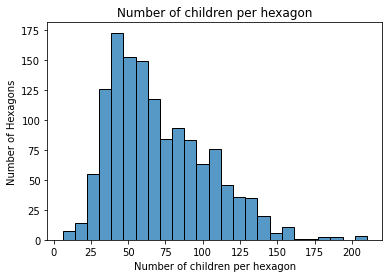

In [11]:
# Number of children per hexagon 
# Removing hexagon with 472 children
s = sns.histplot(data=df[df['num_children']!=472], x="num_children")
s.set(title='Number of children per hexagon')
s.set_xlabel("Number of children per hexagon")
s.set_ylabel("Number of Hexagons")

Text(0, 0.5, 'Number of Hexagons')

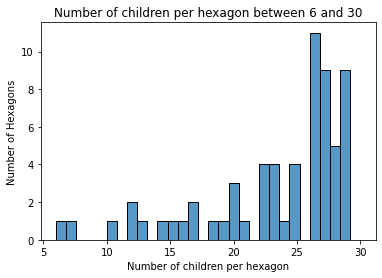

In [13]:
# Plot the number of hexagon with less than 30 children
s = sns.histplot(data=df[df['num_children']<30], x="num_children", binrange=(6,30), bins=30)
s.set(title='Number of children per hexagon between 6 and 30')
s.set_xlabel("Number of children per hexagon")
s.set_ylabel("Number of Hexagons")

In [14]:
# Distribution of number of children per hexagon
df['num_children'].describe(percentiles=[0.05,0.25,0.5,0.75, 0.95])

count    1358.000000
mean       70.827688
std        34.331554
min         6.000000
5%         30.000000
25%        45.000000
50%        64.000000
75%        92.000000
95%       132.000000
max       472.000000
Name: num_children, dtype: float64

# Visualization of deprived_sev

In [15]:
pip install keplergl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 13.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 6.3 MB 41.3 MB/s 
     |████████████████████████████████| 16.7 MB 16.4 MB/s 
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922344 sha256=0ccdb4cf3cdb58dd2c8439c8339368969944f9f1753cb787c3439c56a1328bcf
  Stored in directory: /root/.cache/pip/wheels/4b/19/e5/0852b7888ee350e9c57087ccc61eeab9daf50f5caac9c690ec
Successfully built keplergl


In [18]:
import keplergl

In [21]:
nga_clean.head(2)

,hex_code,year,round,cluster,hhid,indid,location,sex,wealth,wealthscore,...,cnfd,Road_density,cii,n_conflicts,n_education,n_health,OSM_hospital,OSM_school,health_gv_osm,school_gv_osm
0,609534210041970687,2018.0,72.0,739.0,103.803738,5.523364,2.0,1.439252,1.140187,-124478.626168,...,0.0,0.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,609534214102056959,2018.0,72.0,701.0,21.901099,5.219780,2.0,1.505495,1.461538,-108688.439560,...,0.0,0.468752,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import geopandas as gpd

In [23]:
# Create the map
kepler_map = keplergl.KeplerGl(height=400)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [24]:
# This is needed for visualization in colab
from google.colab import output
output.enable_custom_widget_manager()

In [26]:
from shapely.geometry import Polygon

In [27]:
# add geometry information per visualization on the map
nga_clean['geometry'] = nga_clean['hex_code'].apply(lambda x: Polygon(h3.h3_to_geo_boundary(x, geo_json=True)))
nga_clean.head(2)

,hex_code,year,round,cluster,hhid,indid,location,sex,wealth,wealthscore,...,Road_density,cii,n_conflicts,n_education,n_health,OSM_hospital,OSM_school,health_gv_osm,school_gv_osm,geometry
0,609534210041970687,2018.0,72.0,739.0,103.803738,5.523364,2.0,1.439252,1.140187,-124478.626168,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((6.414074827757498 13.082928070478227...
1,609534214102056959,2018.0,72.0,701.0,21.901099,5.219780,2.0,1.505495,1.461538,-108688.439560,...,0.468752,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((6.3589821062563905 13.28773569440975...


In [29]:
# Add data on the map
temp = nga_clean[['geometry', 'deprived_sev']]
kepler_map.add_data(data=gpd.GeoDataFrame(temp), name="Deprived Severity")

In [30]:
kepler_map

KeplerGl(data={'Deprived Severity': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…

In [ ]:
# Save it to html
kepler_map.save_to_html(file_name='nga_deprived_sev.html')


Map saved to nga_deprived_sev.html!
